In [3]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/home/maojiajing/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.17/01


In [4]:
# label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'

lumi = (37.80+44.98+63.67) * 1000 #in pb, CMS recorded 2016 + 2017 + 2018

onelep_br = 0.2134
twolep_br = 0.06729
    
wh = { 'mh125':1.475,
    'mh300':0.06724,
    'mh500':0.008621,
    'mh1000':3.585E-4,
    'mh2000':5.706E-06 }
zh = {  'mh125':9.095E-01,
    'mh300':4.132E-02,
    'mh500':5.256E-03,
    'mh1000':2.977E-04,
    'mh2000':7.639E-06 }
cs = {
}
masses = [ 'mh125', 'mh300','mh500','mh1000','mh2000']
pls = [ 'pl500','pl1000','pl10000']

modes = ['onelep','twolep']
for m in masses:
    cs[m] = {}
    cs[m]['onelep'] = wh[m]*onelep_br
    cs[m]['twolep'] = zh[m]*twolep_br

n_mc = {}
for k,v in cs.items():
    n_mc[k] = {}
    for j,u in v.items():
        n_mc[k][j] = lumi*u
        print(k,j,n_mc[k][j])


('mh2000', 'onelep', 0.17832636558)
('mh2000', 'twolep', 0.0752794459995)
('mh125', 'onelep', 46097.33425)
('mh125', 'twolep', 8962.77734475)
('mh300', 'onelep', 2101.4133932)
('mh300', 'twolep', 407.19291906)
('mh500', 'onelep', 269.42719903)
('mh500', 'twolep', 51.795885348000006)
('mh1000', 'onelep', 11.203996155)
('mh1000', 'twolep', 2.9337205228500003)


In [5]:
fpath =OrderedDict()
tree = OrderedDict()
NEvents = OrderedDict()
wzNEvents = OrderedDict()
trig = OrderedDict()
trig_lepId = OrderedDict()
trig_lepId_dijet = OrderedDict()


directory = '/home/maojiajing/cms-llp/samples/bkg/20190430QCD/'
#name_string = 'QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
name_string1 = 'QCD_'
name_string2 = '_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

#fpath['HT1000to1500'] = directory + name_string1 + 'HT1000to1500' + name_string2
#HTs = ['HT500to700']
#HTs = ['HT50to100']
#HTs = ['HT100to200','HT200to300','HT300to500','HT500to700','HT700to1000','HT1000to1500','HT1500to2000','HT2000toInf','HT50toInf']
HTs = ['HT50to100','HT100to200','HT200to300','HT300to500','HT500to700','HT700to1000','HT1000to1500','HT1500to2000','HT2000toInf','HT50toInf']

for ht in HTs:
    fpath[ht] = directory + name_string1 + ht + name_string2
    #print ht, fpath[ht]
    
print 'Files ready'
 

for k,v in fpath.items():
#         tree[k][j] = rtnp.root2array(u)
    root_dir = uproot.open(v) 
    wzNEvents[k] = root_dir['wzNEvents']
    NEvents[k] = root_dir['NEvents']
    trig[k] = root_dir['trig']
    trig_lepId[k] = root_dir['trig_lepId']
    trig_lepId_dijet[k] = root_dir['trig_lepId_dijet']

    tree[k] = root_dir['vH']
    a = tree[k]["jetPt"].array()
    print k, tree[k],(a[:-1][0])
    
    
trigger_names_file = '/home/maojiajing/cms-llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
#if wH:
#    trigger_paths = [87,135] #PFMET120
#else:
#    trigger_paths = [177,362,87,135] #PFMET120
trigger_paths = [177,362,87,135] #PFMET120

# 177 HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ
# 362 HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ
# 310 HLT_PFMET120_PFMHT120_IDTight
# 87 HLT_Ele32_WPTight_Gsf
# 135 HLT_IsoMu24
# 310 PFMET




Files ready
HT50to100 <TTree 'vH' at 0x7f7344f3e090> [33.321537 27.750795]
HT100to200 <TTree 'vH' at 0x7f7344f1ae50> [41.51078 32.13414]
HT200to300 <TTree 'vH' at 0x7f7344057650> [92.687416 59.51981  58.95931  36.61881  22.320795]
HT300to500 <TTree 'vH' at 0x7f733ffe3a10> [107.77108   98.57224   53.352768  33.500465  22.817123]
HT500to700 <TTree 'vH' at 0x7f733eeb0d90> [298.9782   274.38492   68.25887   24.826727]
HT700to1000 <TTree 'vH' at 0x7f733ff70110> [355.92612  289.09525   42.906986  25.2769  ]
HT1000to1500 <TTree 'vH' at 0x7f733ff12490> [584.21387  462.4421    86.01361   58.527615]
HT1500to2000 <TTree 'vH' at 0x7f733fee2750> [453.7073   200.82129   36.469604]
HT2000toInf <TTree 'vH' at 0x7f733ee6fb50> [998.35     980.72595   31.336851  20.656252]
HT50toInf <TTree 'vH' at 0x7f733ee28dd0> [584.21387  462.4421    86.01361   58.527615]


In [6]:
# inclusive trigger efficiency * acceptance
triggered = {}

for k,T in tree.items():
    hlt = T['HLTDecision'].array()
    triggered[k] = np.zeros(hlt[:,0].shape)
    #print(len(hlt),wzNEvents[k][1],trig[k][1],trig_lepId[k][1],trig_lepId_dijet[k][1])
    for tr in trigger_paths:
        triggered[k]  = np.logical_or(triggered[k],hlt[:,tr])
    #print(k, 1.0*np.count_nonzero(triggered[k]),trig_lepId_dijet[k][1] )
    #assert( (1.0*np.count_nonzero(triggered[k])) == trig_lepId_dijet[k][1])

    print(triggered[k].shape)

(2470,)
(103666,)
(102603,)
(111885,)
(131392,)
(74130,)
(22266,)
(25046,)
(12917,)
(586375,)


In [7]:
met = {}
cuts = [15,30,50,100,300]
eff_table = PrettyTable()
fieldname = ["m#phi\met cut","triggered(%)","triggered+lepId(%)","triggered+lepid+dijet(%)"]
for c in cuts:
    fieldname.append(str(c)+' GeV(%)')
eff_table.field_names = fieldname
for k,v in fpath.items():
    root_dir = uproot.open(v) 
    wzNEvents[k] = root_dir['wzNEvents']
    trig[k] = root_dir['trig']
    trig_lepId[k] = root_dir['trig_lepId']
    trig_lepId_dijet[k] = root_dir['trig_lepId_dijet']

    tree[k] = root_dir['vH']
    a = tree[k]["jetPt"].array()
    #print k, tree[k],(a[:-1][0])
    
    print k, trig[k][1], trig_lepId[k][1], trig_lepId_dijet[k][1], NEvents[k][1]
  

HT50to100 36.0 14.0 3.0 4180469.0
HT100to200 5642.0 1624.0 538.0 76191144.0
HT200to300 10859.0 2194.0 1603.0 52939760.0
HT300to500 18705.0 2691.0 2333.0 54552850.0
HT500to700 35298.0 3506.0 3288.0 62991440.0
HT700to1000 26973.0 2144.0 2061.0 35467290.0
HT1000to1500 10393.0 771.0 748.0 10556564.0
HT1500to2000 14543.0 922.0 909.0 11839357.0
HT2000toInf 8746.0 528.0 516.0 5902911.0
HT50toInf 131195.0 14394.0 11999.0 314621800.0


In [8]:
met = {}
cuts = [15,30,50,100,300]
eff_table = PrettyTable()
fieldname = ["m#phi\met cut","triggered(%)","triggered+lepId(%)","triggered+lepid+dijet(%)"]
for c in cuts:
    fieldname.append(str(c)+' GeV(%)')
eff_table.field_names = fieldname
for k, T in tree.items():
    row = [k, round(trig[k][1]/NEvents[k][1]*100,2),round(trig_lepId[k][1]/NEvents[k][1]*100,2),round(trig_lepId_dijet[k][1]/NEvents[k][1]*100,2)]
    row_k = [round(trig[k][1]/NEvents[k][1]*100,2),round(trig_lepId[k][1]/NEvents[k][1]*100,2),round(trig_lepId_dijet[k][1]/NEvents[k][1]*100,2)]
    met[k] = T['met'].array()
 
    #print(k,T,', number of events:'+str((NEvents[k][1])))
    for i in cuts:
        triggered_met = np.logical_and(met[k]>i, triggered[k])
        eff = np.count_nonzero(triggered_met)/NEvents[k][1]
        row.append(str(round(eff*100,2)))
        row_k.append(round(eff*100,2))
    #print(*row_k, sep=", ")
    eff_table.add_row(row)
print(eff_table)

+---------------+--------------+--------------------+--------------------------+-----------+-----------+-----------+------------+------------+
| m#phi\met cut | triggered(%) | triggered+lepId(%) | triggered+lepid+dijet(%) | 15 GeV(%) | 30 GeV(%) | 50 GeV(%) | 100 GeV(%) | 300 GeV(%) |
+---------------+--------------+--------------------+--------------------------+-----------+-----------+-----------+------------+------------+
|   HT50to100   |     0.0      |        0.0         |           0.0            |    0.0    |    0.0    |    0.0    |    0.0     |    0.0     |
|   HT100to200  |     0.01     |        0.0         |           0.0            |    0.0    |    0.0    |    0.0    |    0.0     |    0.0     |
|   HT200to300  |     0.02     |        0.0         |           0.0            |    0.0    |    0.0    |    0.0    |    0.0     |    0.0     |
|   HT300to500  |     0.03     |        0.0         |           0.0            |    0.0    |    0.0    |    0.0    |    0.0     |    0.0     |

In [9]:
## Cut on jet timing
jetTime = {}
jetTime_met = {}
met_cut = 30
#time_cuts = [0, 0.25, 0.5,0.6,0.7,0.8,0.9,1]
time_cuts = [-3,-2,-1,0,0.5,1,2,3,4,5,6]
efftime_table = PrettyTable()
fieldname = ["m#phi\Time cut"]
for c in time_cuts:
    fieldname.append(str(c)+' ns')
efftime_table.field_names = fieldname
for k, T in tree.items():
    jetTime[k] = T['jetTime'].array()
    met[k] = T['met'].array()
    #print(k,', number of events:'+str(len(met[k])))
    triggered_met = np.logical_and(met[k] > met_cut, triggered[k])
    print k, triggered_met
    row = [k]
    row_keynote = []
    for i in time_cuts:
#         jetTime[k] = jetTime[k][np.logical_not(np.isnan(jetTime[k]))]
#         triggered_met = awkward.JaggedArray.fromiter([triggered_met[i] for i in range(len(triggered_met)) if len(jetTime[k][i])>0])
#         jetTime[k] = awkward.JaggedArray.fromiter([x for x in jetTime[k] if len(x)>0])
#         assert(jetTime[k].shape == triggered_met.shape)
#         triggered_time = np.logical_and(triggered_met, jetTime[k][:,0] > i)
        triggered_time = np.logical_and(triggered_met, (jetTime[k] > i).any())
        temp = jetTime[k] > i
        temp = temp.any()
#         print(temp[0],jetTime[k][0],i)
#         print(temp)
        jetTime_met[k] = jetTime[k][triggered_met][:,0]
        eff = np.count_nonzero(triggered_time)/NEvents[k][1]
        row.append(str(round(eff*100,2)))
        row_keynote.append(round(eff*100,2))
    efftime_table.add_row(row)
    #print(*row_keynote, sep=", ")
print(efftime_table) # apply the time cut on max pT

HT50to100 [False False False ... False False False]
HT100to200 [False False False ... False False False]


/usr/local/lib/python2.7/dist-packages/awkward/array/jagged.py:944: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


HT200to300 [False False False ... False False False]
HT300to500 [False False False ... False False False]
HT500to700 [False False False ... False False False]
HT700to1000 [False False False ... False False False]
HT1000to1500 [False False False ... False False False]
HT1500to2000 [False False False ... False False False]
HT2000toInf [False False False ... False False False]
HT50toInf [False False False ... False False False]
+----------------+-------+-------+-------+------+--------+------+------+------+------+------+------+
| m#phi\Time cut | -3 ns | -2 ns | -1 ns | 0 ns | 0.5 ns | 1 ns | 2 ns | 3 ns | 4 ns | 5 ns | 6 ns |
+----------------+-------+-------+-------+------+--------+------+------+------+------+------+------+
|   HT50to100    |  0.0  |  0.0  |  0.0  | 0.0  |  0.0   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  |
|   HT100to200   |  0.0  |  0.0  |  0.0  | 0.0  |  0.0   | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  |
|   HT200to300   |  0.0  |  0.0  |  0.0  | 0.0  |  0.0   | 0.0  | 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


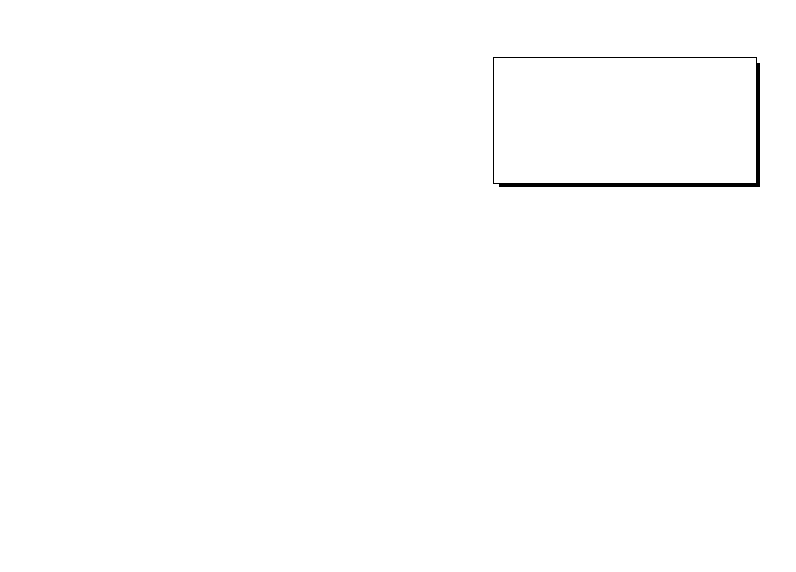

In [18]:
# plot leading jet pT
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

#legend = {'mh125':'(m#phi,ms) = (125,50) GeV',
#          'mh300':'(m#phi,ms) = (300,125) GeV',
#         'mh500':'(m#phi,ms) = (500,225) GeV',
#          'mh1000':'(m#phi,ms) = (1000,475) GeV',
#          'mh2000':'(m#phi,ms) = (2000,975) GeV',
#         }

for k,v in jetTime_met.items():   
    #print k, v
    
#     h[k] = create_TH1D( v, axis_title=['MET [GeV]', 'fraction of events'], name=k, binning=[50,0,1500])
    h[k] = create_TH1D( v, axis_title=['jetTime [ns]', 'fraction of events'], name=k, binning=[50,-5,5])
    h[k].SetLineColor(std_color_list[i])
    h[k].SetMarkerColor(std_color_list[i])

    #leg.AddEntry(h[k],legend[k])
    leg.AddEntry(h[k],k)
    leg.SetBorderSize(0)
#     h[k].GetYaxis().SetRangeUser(0,300)
    if i == 0:
        h[k].DrawNormalized('')
    else:
        h[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

In [19]:
## Cut on jet timing
jetTime = {}
jetPt = {}
weight = {}
jetTime_met = {}
met_cut = 30
pt_cut = 200
#time_cuts = [0, 0.25, 0.5,0.6,0.7,0.8,0.9,1]
time_cuts = [-3,-2,-1,0,0.5,1,2,3,4,5,6]
efftime_table = PrettyTable()
fieldname = ["m#phi\Time cut"]
for c in time_cuts:
    fieldname.append(str(c)+' ns')
efftime_table.field_names = fieldname
for k, T in tree.items():
    jetPt[k] = T['jetPt'].array()
    #print jetPt[k][0]
    #print jetPt[k][0][0]
    #print jetPt[k][0][1]
    #print jetPt[k][:,1] # access the 2nd component in 2d array
    #print len(jetPt[k])
    #print len(jetPt[k][0])
    #print jetPt[k][0:10]
    #print jetPt[k][0:10][0]
    #print jetPt[k][0:10][0][0]
    #print len(jetPt[k][1:10])
    #raise
    #print k, len(jetPt)
    jetTime[k] = T['jetTime'].array()
    #print len(jetTime[k])
    #print len(jetTime[k][0])
    met[k] = T['met'].array()
    #print len(met[k])
    
    #print(k,', number of events:'+str(len(met[k])))
    cutted_met = np.logical_and(met[k] > met_cut, jetPt[k][:,1] > pt_cut)
    #print k, cutted_met
    row = [k]
    row_keynote = []
    for i in time_cuts:
        cutted_time = np.logical_and(cutted_met, (jetTime[k] > i).any())
        #print np.count_nonzero(cutted_time)
        temp = jetTime[k] > i
        temp = temp.any()
#         print(temp[0],jetTime[k][0],i)
#         print(temp)
        #jetTime_met[k] = jetTime[k][cutted_met][:,0]
        eff = np.count_nonzero(cutteded_time)/NEvents[k][1]
        #print eff, NEvents[k][1]
        row.append(str(round(eff*100,2)))
        row_keynote.append(round(eff*100,2))
    efftime_table.add_row(row)
    #print(*row_keynote, sep=", ")
print(efftime_table) # apply the time cut on max pT

NameError: name 'cutteded_time' is not defined

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>
HT500to700 <TTree 'vH' at 0x7f733eeb0c90>
HT700to1000 <TTree 'vH' at 0x7f733ff93fd0>
HT1000to1500 <TTree 'vH' at 0x7f733ff12390>
HT1500to2000 <TTree 'vH' at 0x7f733fee2650>
HT2000toInf <TTree 'vH' at 0x7f733ee6fa50>
HT50toInf <TTree 'vH' at 0x7f733ee28cd0>


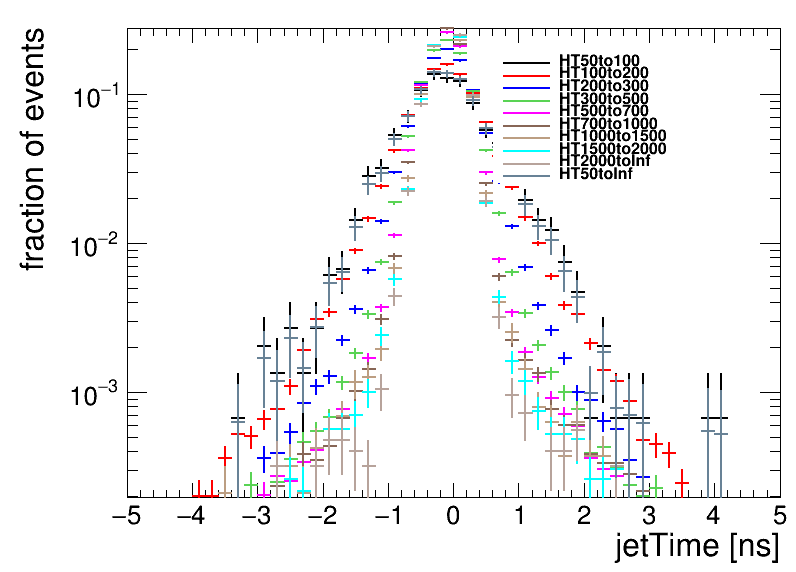

In [20]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
ht0 = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    jetTime[k] = v['jetTime'].array()
    weight[k] = v['weight'].array()
    t = jetTime[k][:,0]
    ht0[k] = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=k, binning=[50,-5,5], weights = weight[k])
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(ht0[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        ht0[k].DrawNormalized('')
    else:
        ht0[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>
HT500to700 <TTree 'vH' at 0x7f733eeb0c90>
HT700to1000 <TTree 'vH' at 0x7f733ff93fd0>
HT1000to1500 <TTree 'vH' at 0x7f733ff12390>
HT1500to2000 <TTree 'vH' at 0x7f733fee2650>
HT2000toInf <TTree 'vH' at 0x7f733ee6fa50>
HT50toInf <TTree 'vH' at 0x7f733ee28cd0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT100to200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT200to300 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT300to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT700to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1000to1500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1500to2000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT2000toInf (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).


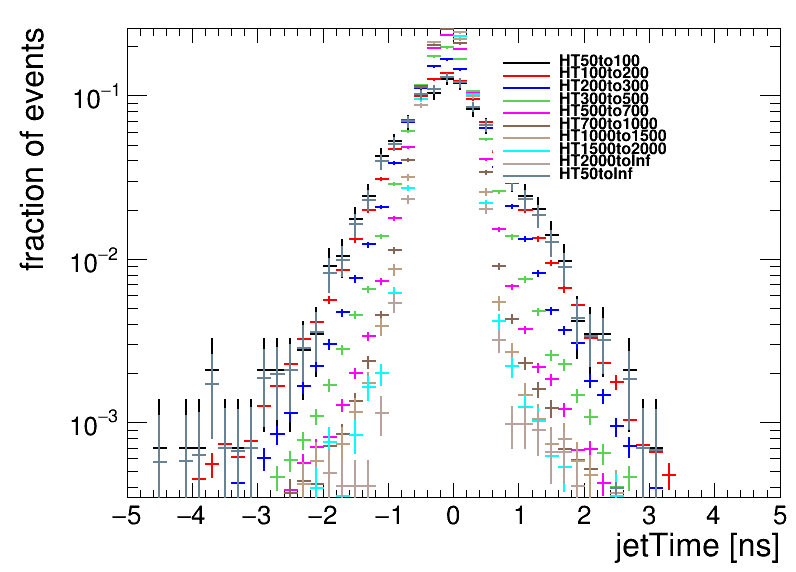

In [21]:
# plot subleading jet time
c = rt.TCanvas('c','c', 800, 600)
ht1 = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    jetTime[k] = v['jetTime'].array()
    t = jetTime[k][:,1]
    ht1[k] = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=k, binning=[50,-5,5], weights = weight[k])
    ht1[k].SetLineColor(std_color_list[i])
    ht1[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(ht1[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        ht1[k].DrawNormalized('')
    else:
        ht1[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


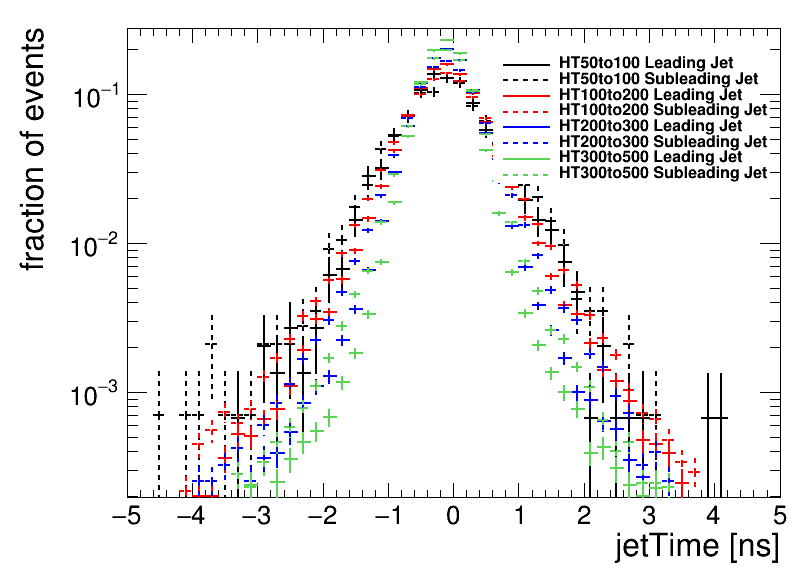

In [22]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    #jetTime[k] = v['jetTime'].array()
    #t0 = jetTime[k][:,0]
    #t1 = jetTime[k][:,1]
 
    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])
    
    ht1[k].SetLineStyle(7)
    ht1[k].SetLineColor(std_color_list[i])
    ht1[k].SetMarkerColor(std_color_list[i])
  
     
    leg.AddEntry(ht0[k],k+' Leading Jet')
    leg.AddEntry(ht1[k],k+' Subleading Jet')
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        ht0[k].DrawNormalized('')
        ht1[k].DrawNormalized('same')
    else:
        ht0[k].DrawNormalized('same')
        ht1[k].DrawNormalized('same')
    i += 1
    if i == 4:
        break
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>
HT500to700 <TTree 'vH' at 0x7f733eeb0c90>
HT700to1000 <TTree 'vH' at 0x7f733ff93fd0>
HT1000to1500 <TTree 'vH' at 0x7f733ff12390>
HT1500to2000 <TTree 'vH' at 0x7f733fee2650>
HT2000toInf <TTree 'vH' at 0x7f733ee6fa50>
HT50toInf <TTree 'vH' at 0x7f733ee28cd0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT100to200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT200to300 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT300to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT700to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1000to1500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1500to2000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT2000toInf (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).


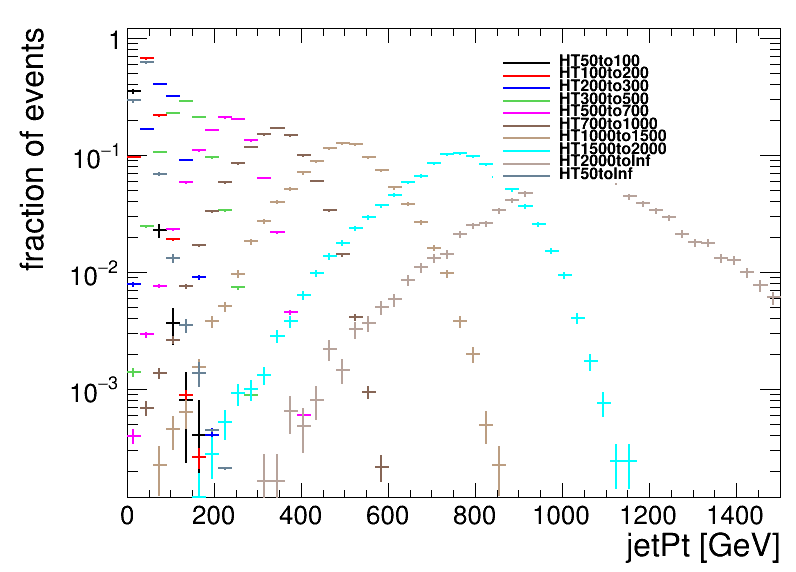

In [23]:
# plot leading jet pt
c = rt.TCanvas('c','c', 800, 600)
hpt0 = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    jetTime[k] = v['jetTime'].array()
    jetPt[k] = v['jetPt'].array()
    pt = jetPt[k][:,0]
    hpt0[k] = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=k, binning=[50,0,1500], weights = weight[k])
    hpt0[k].SetLineColor(std_color_list[i])
    hpt0[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(hpt0[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        hpt0[k].DrawNormalized('')
    else:
        hpt0[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>
HT500to700 <TTree 'vH' at 0x7f733eeb0c90>
HT700to1000 <TTree 'vH' at 0x7f733ff93fd0>
HT1000to1500 <TTree 'vH' at 0x7f733ff12390>
HT1500to2000 <TTree 'vH' at 0x7f733fee2650>
HT2000toInf <TTree 'vH' at 0x7f733ee6fa50>
HT50toInf <TTree 'vH' at 0x7f733ee28cd0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT100to200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT200to300 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT300to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT700to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1000to1500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1500to2000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT2000toInf (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).


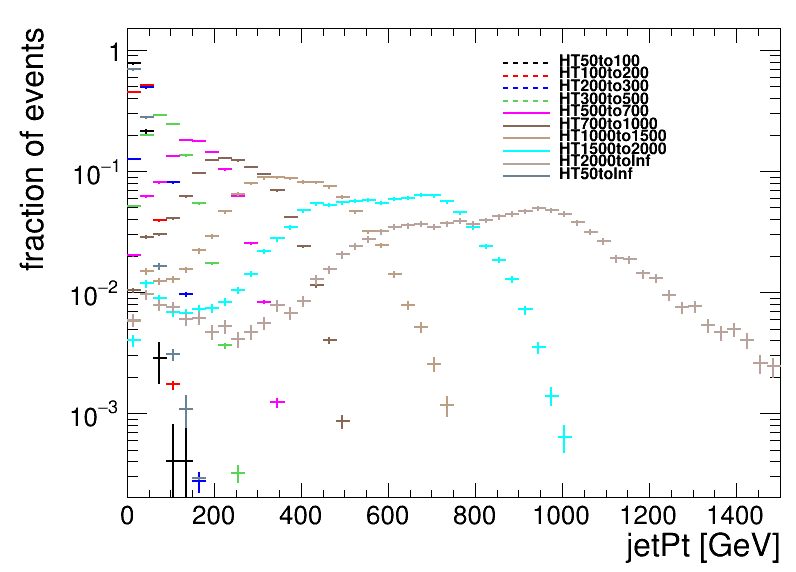

In [24]:
# plot subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
hpt1 = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    jetTime[k] = v['jetTime'].array()
    jetPt[k] = v['jetPt'].array()
    pt = jetPt[k][:,1]
    hpt1[k] = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=k, binning=[50,0,1500], weights = weight[k])
    hpt1[k].SetLineColor(std_color_list[i])
    hpt1[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(ht1[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        hpt1[k].DrawNormalized('')
    else:
        hpt1[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f7344f1a890>
HT100to200 <TTree 'vH' at 0x7f733d97c510>
HT200to300 <TTree 'vH' at 0x7f7344057550>
HT300to500 <TTree 'vH' at 0x7f733ffe3910>
HT500to700 <TTree 'vH' at 0x7f733eeb0c90>
HT700to1000 <TTree 'vH' at 0x7f733ff93fd0>
HT1000to1500 <TTree 'vH' at 0x7f733ff12390>
HT1500to2000 <TTree 'vH' at 0x7f733fee2650>
HT2000toInf <TTree 'vH' at 0x7f733ee6fa50>
HT50toInf <TTree 'vH' at 0x7f733ee28cd0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


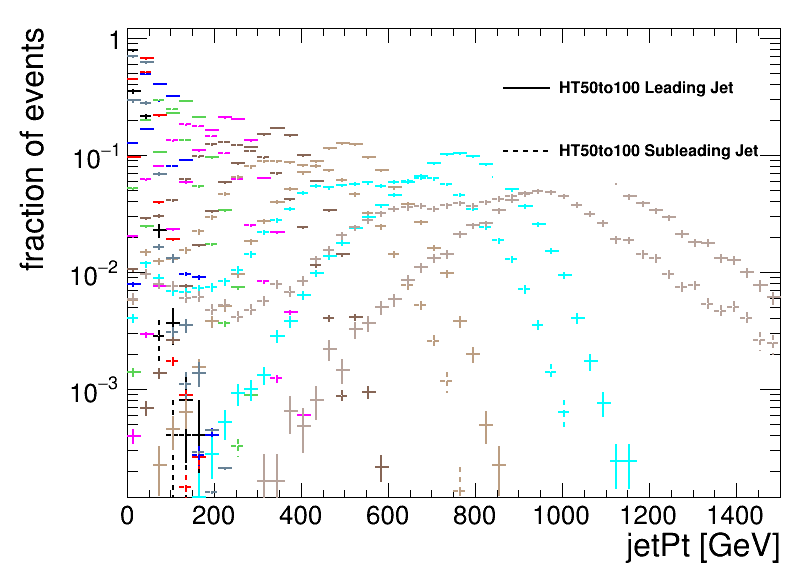

In [25]:
# plot leading n subleading jet pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    #jetTime[k] = v['jetTime'].array()
    #t0 = jetTime[k][:,0]
    #t1 = jetTime[k][:,1]
 
    hpt0[k].SetLineStyle(1)
    hpt0[k].SetLineColor(std_color_list[i])
    hpt0[k].SetMarkerColor(std_color_list[i])
    
    hpt1[k].SetLineStyle(7)
    hpt1[k].SetLineColor(std_color_list[i])
    hpt1[k].SetMarkerColor(std_color_list[i])
  
     
    #leg.AddEntry(h0[k],k+' Leading Jet')
    #leg.AddEntry(h1[k],k+' Subleading Jet')
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        hpt0[k].DrawNormalized('')
        hpt1[k].DrawNormalized('same')
        leg.AddEntry(hpt0[k],k+' Leading Jet')
        leg.AddEntry(hpt1[k],k+' Subleading Jet')
    else:
        hpt0[k].DrawNormalized('same')
        hpt1[k].DrawNormalized('same')
    i += 1
    #if i == 4:
    #    break
leg.Draw()
c.SetLogy()
c.Draw()

In [26]:
 # plot jet time
c = rt.TCanvas('c','c', 800, 600)
ht = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0
flat_weight = {}

for k,v in tree.items():   
    #print k, v
    jetTime[k] = v['jetTime'].array()
    sizes = [len(x) for x in jetTime[k]]
    t = jetTime[k].flatten()
    flat_weight[k] = []
    for j, (n, val) in enumerate(zip(sizes, weight[k])):
#         print n
#         print val
#         print n*[val]
        flat_weight[k] += n*[val]
#         print flat_weight
#         if i>4: raise
#     flat_weight = np.array([n*[val] for n,val in zip(sizes, weight[k])])
    flat_weight[k] = np.array(flat_weight[k])
    #print t.shape
    #print flat_weight[k].shape
#     raise
    
    ht[k] = create_TH1D( t, axis_title=['jetTime [ns]', 'fraction of events'], name=k, binning=[50,-5,5], weights = flat_weight[k])
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(ht[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        ht[k].DrawNormalized('')
    else:
        ht[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.46701]}
2
59.46701
[59.46701, 59.46701]
{'HT50to100': [59.46701, 59.46701, 59.46701, 59.46701, 59.46701, 59.4670

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2
0.36736554
[0.36736554, 0.36736554]
{'HT50to100': array([59.46701, 59.46701, 59.46701, ..., 59.46701, 59.46701, 59.46701],
      dtype=float32), 'HT100to200': [0.36736554, 0.36736554]}
2
0.36736554
[0.36736554, 0.36736554]
{'HT50to100': array([59.46701, 59.46701, 59.46701, ..., 59.46701, 59.46701, 59.46701],
      dtype=float32), 'HT100to200': [0.36736554, 0.36736554, 0.36736554, 0.36736554]}
2
0.36736554
[0.36736554, 0.36736554]
{'HT50to100': array([59.46701, 59.46701, 59.46701, ..., 59.46701, 59.46701, 59.46701],
      dtype=float32), 'HT100to200': [0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554]}
2
0.36736554
[0.36736554, 0.36736554]
{'HT50to100': array([59.46701, 59.46701, 59.46701, ..., 59.46701, 59.46701, 59.46701],
      dtype=float32), 'HT100to200': [0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554, 0.36736554]}
2
0.36736554
[0.36736554, 0.36736554]
{'HT50to100': array([59.46701, 59.46701, 59.46701, ..., 59.46701, 59.4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).


HT50to100 <TTree 'vH' at 0x7f9c4dd16350>
HT100to200 <TTree 'vH' at 0x7f9c4dd16610>
HT200to300 <TTree 'vH' at 0x7f9c4ce25f10>
HT300to500 <TTree 'vH' at 0x7f9c4ce141d0>
HT500to700 <TTree 'vH' at 0x7f9c4ccaf550>
HT700to1000 <TTree 'vH' at 0x7f9c4cd5f950>
HT1000to1500 <TTree 'vH' at 0x7f9c4cd4cd50>
HT1500to2000 <TTree 'vH' at 0x7f9c4cd130d0>
HT2000toInf <TTree 'vH' at 0x7f9c4c7d64d0>
HT50toInf <TTree 'vH' at 0x7f9c4c2188d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT100to200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT200to300 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT300to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT700to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1000to1500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1500to2000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT2000toInf (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).


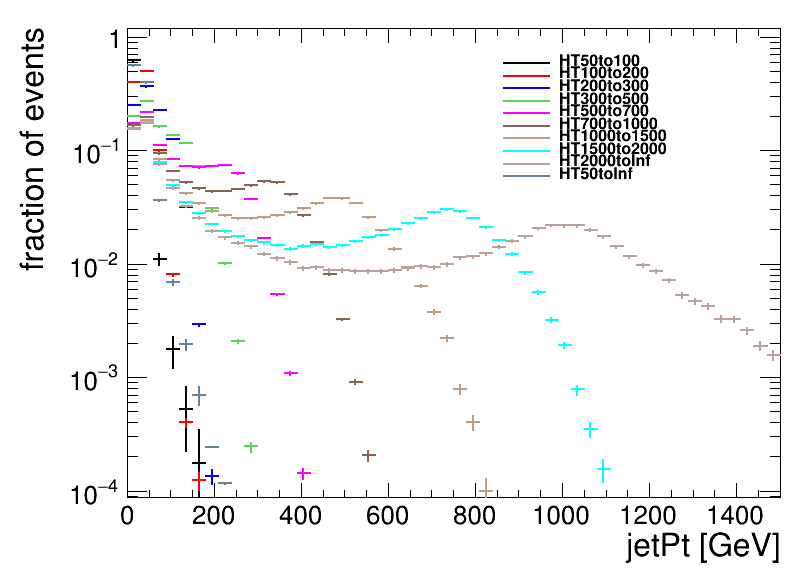

In [17]:
# plot jet pt
c = rt.TCanvas('c','c', 800, 600)
hpt = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    jetTime[k] = v['jetTime'].array()
    #print len(jetTime[k])
    jetPt[k] = v['jetPt'].array()
    #print len(jetPt[k])
    pt = jetPt[k].flatten()
    #print len(pt)
    hpt[k] = create_TH1D( pt, axis_title=['jetPt [GeV]', 'fraction of events'], name=k, binning=[50,0,1500], weights = flat_weight[k])
    hpt[k].SetLineColor(std_color_list[i])
    hpt[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(hpt[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        hpt[k].DrawNormalized('')
    else:
        hpt[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f9c4dd16350>
HT100to200 <TTree 'vH' at 0x7f9c4dd16610>
HT200to300 <TTree 'vH' at 0x7f9c4ce25f10>
HT300to500 <TTree 'vH' at 0x7f9c4ce141d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


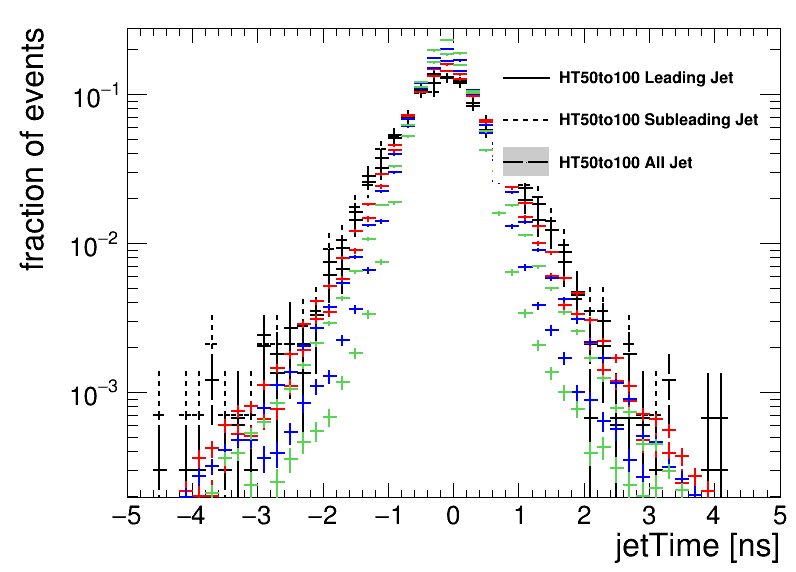

In [18]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    #jetTime[k] = v['jetTime'].array()
    #t0 = jetTime[k][:,0]
    #t1 = jetTime[k][:,1]
 
    ht0[k].SetLineStyle(1)
    ht0[k].SetLineColor(std_color_list[i])
    ht0[k].SetMarkerColor(std_color_list[i])
    
    ht1[k].SetLineStyle(7)
    ht1[k].SetLineColor(std_color_list[i])
    ht1[k].SetMarkerColor(std_color_list[i])

    ht[k].SetLineStyle(9)
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetFillColorAlpha(std_color_list[i],0.2)
    ht[k].SetMarkerColor(std_color_list[i])
  
     

    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        ht0[k].DrawNormalized('')
        ht1[k].DrawNormalized('same')
        ht[k].DrawNormalized('same')
        leg.AddEntry(ht0[k],k+' Leading Jet')
        leg.AddEntry(ht1[k],k+' Subleading Jet')
        leg.AddEntry(ht[k],k+' All Jet')
    else:
        ht0[k].DrawNormalized('same')
        ht0[k].DrawNormalized('same')
        ht[k].DrawNormalized('same')
    i += 1
    if i == 4:
        break
leg.Draw()
c.SetLogy()
c.Draw()

HT50to100 <TTree 'vH' at 0x7f9c4dd16350>
HT100to200 <TTree 'vH' at 0x7f9c4dd16610>
HT200to300 <TTree 'vH' at 0x7f9c4ce25f10>
HT300to500 <TTree 'vH' at 0x7f9c4ce141d0>
HT500to700 <TTree 'vH' at 0x7f9c4ccaf550>
HT700to1000 <TTree 'vH' at 0x7f9c4cd5f950>
HT1000to1500 <TTree 'vH' at 0x7f9c4cd4cd50>
HT1500to2000 <TTree 'vH' at 0x7f9c4cd130d0>
HT2000toInf <TTree 'vH' at 0x7f9c4c7d64d0>
HT50toInf <TTree 'vH' at 0x7f9c4c2188d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


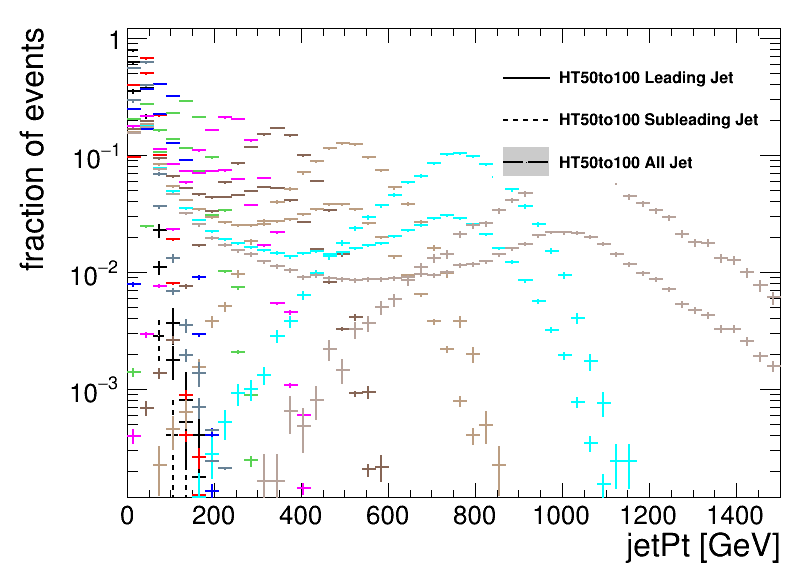

In [19]:
# plot leading n subleading jet time
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0


for k,v in tree.items():   
    print k, v
    #jetTime[k] = v['jetTime'].array()
    #t0 = jetTime[k][:,0]
    #t1 = jetTime[k][:,1]
 
    hpt0[k].SetLineStyle(1)
    hpt0[k].SetLineColor(std_color_list[i])
    hpt0[k].SetMarkerColor(std_color_list[i])
    
    hpt1[k].SetLineStyle(7)
    hpt1[k].SetLineColor(std_color_list[i])
    hpt1[k].SetMarkerColor(std_color_list[i])

    hpt[k].SetLineStyle(9)
    hpt[k].SetLineColor(std_color_list[i])
    hpt[k].SetFillColorAlpha(std_color_list[i],0.2)
    hpt[k].SetMarkerColor(std_color_list[i])
  
     

    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        hpt0[k].DrawNormalized('')
        hpt1[k].DrawNormalized('same')
        hpt[k].DrawNormalized('same')
        leg.AddEntry(hpt0[k],k+' Leading Jet')
        leg.AddEntry(hpt1[k],k+' Subleading Jet')
        leg.AddEntry(hpt[k],k+' All Jet')
    else:
        hpt0[k].DrawNormalized('same')
        hpt0[k].DrawNormalized('same')
        hpt[k].DrawNormalized('same')
    i += 1
    #if i == 4:
    #    break
leg.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: HT50to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT100to200 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT200to300 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT300to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT500to700 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT700to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1000to1500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT1500to2000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT2000toInf (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: HT50toInf (Potential memory leak).


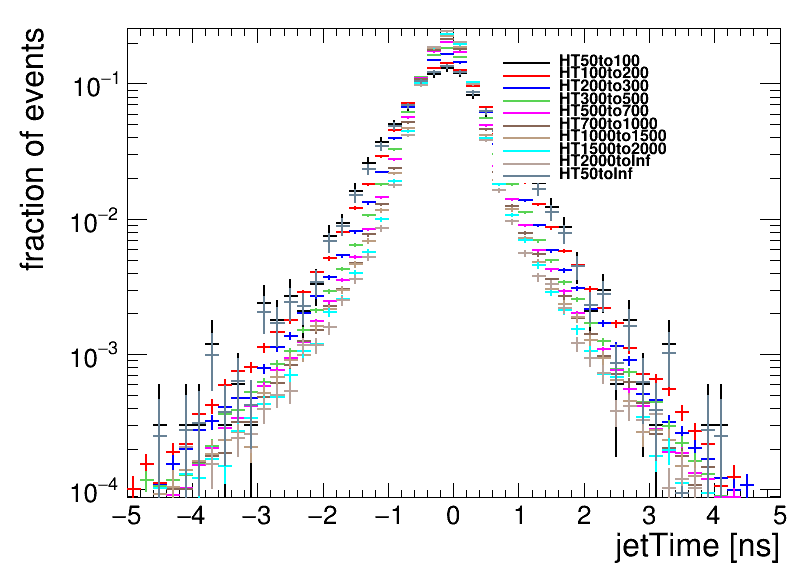

In [20]:
 # plot jet time
c = rt.TCanvas('c','c', 800, 600)
htcut = {}
leg = rt.TLegend(0.62,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

cut_weight = {}

for k,v in tree.items():   
    #print k, v
    jetTime[k] = v['jetTime'].array()
    jetPt[k] = v['jetPt'].array()
    #print len(jetTime[k])
    t = jetTime[k].flatten()
    pt = jetPt[k].flatten()
    #test cut
    #cut = 'pt>20'
    cutted_t = t[pt>20]
    cut_weight = flat_weight[k][pt>20]
    #cutted_t = np.logical_and(pt>-20, t>-1)
    #count = np.count_nonzero(cutted_met) 
    #print count
    #print len(t)
    htcut[k] = create_TH1D( cutted_t, axis_title=['jetTime [ns]', 'fraction of events'], name=k, binning=[50,-5,5], weights = cut_weight)
    htcut[k].SetLineColor(std_color_list[i])
    htcut[k].SetMarkerColor(std_color_list[i])

     
    leg.AddEntry(htcut[k],k)
    leg.SetBorderSize(0)
    #h[k].GetYaxis().SetRangeUser(0,500)
    if i == 0:
        htcut[k].DrawNormalized('')
    else:
        htcut[k].DrawNormalized('same')
    i += 1
leg.Draw()
c.SetLogy()
c.Draw()